In [91]:
import numpy as np
import pandas as pd
from src.dataPipeline import DataPipeline
import yaml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [92]:
dp = DataPipeline()
dp.readCsv("../data/immo_data_202208_v2.csv")
dp.mergeColumns()
with open('../src/params.yaml', 'r', encoding='utf-8') as file:
    params = yaml.safe_load(file)
dp.dropColumns(params['columns_to_drop_all'])
dp.cleanData()
df_clean = dp.getData()

C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:38: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

In [93]:
df_clean.head()

,Availability,Floor,detail_responsive#surface_usable,Gross return,Floor_space_merged,details,lat,lon,ForestDensityL,ForestDensityM,...,type_unified,Plot_area_unified,provider,No. of rooms:,Number of apartments:,Room height:,Last refurbishment:,Year built:,features,Number of floors:
0,On request,4,NaN,NaN,NaN,"3.5 rooms, 100 m²,",47.417100,8.085600,0.511176,0.286451,...,penthouse,nan,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,On request,NaN,NaN,NaN,242,"4.5 rooms, 156 m²,",47.419500,8.082700,0.511176,0.286451,...,terrace-house,222.0,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Immediately,2,NaN,NaN,NaN,"2.5 rooms, 93 m²,",47.403300,8.033000,0.163362,0.095877,...,penthouse,nan,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,On request,NaN,NaN,NaN,257,"4.5 rooms, 154 m²,",47.415643,8.085423,0.511176,0.286451,...,detached-house,370.0,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,On request,0,NaN,NaN,NaN,"4.5 rooms, 142 m²,",47.403824,8.048288,0.333865,0.279276,...,flat,nan,Immoscout24.ch,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_clean[["Space extracted", "Floor_space_merged"]].isna().sum()

Space extracted         889
Floor_space_merged    18341
dtype: int64

In [95]:
df_clean.isna().sum()

Availability                         8853
Floor                               11227
detail_responsive#surface_usable    20837
Gross return                        20935
Floor_space_merged                  18341
                                    ...  
Room height:                        20675
Last refurbishment:                 18711
Year built:                         14216
features                            12881
Number of floors:                   18594
Length: 70, dtype: int64

In [96]:
# Columns to drop
columns_to_drop = ["Gross return", "details", "type", "provider", "plz_parsed", "lat", "lon", "Latitude", "Longitude", "plz_parsed","features"]

In [97]:
df_clean = df_clean.drop(columns=columns_to_drop)

In [98]:
# categorical columns
categorical_columns = ["Availability", "type_unified"]

In [99]:
# numerical columns
numerical_columns = ["Area", "Rooms", "Floor", "Rent", "Price"]

In [100]:
df_clean.head()

,Availability,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,...,price_cleaned,Space extracted,type_unified,Plot_area_unified,No. of rooms:,Number of apartments:,Room height:,Last refurbishment:,Year built:,Number of floors:
0,On request,4,NaN,NaN,0.511176,0.286451,0.090908,0.0,0.0,0.0,...,1150000.0,100.0,penthouse,nan,5.0,NaN,NaN,NaN,NaN,NaN
1,On request,NaN,NaN,242,0.511176,0.286451,0.090908,0.0,0.0,0.0,...,1420000.0,156.0,terrace-house,222.0,5.0,NaN,NaN,NaN,NaN,NaN
2,Immediately,2,NaN,NaN,0.163362,0.095877,0.001911,0.0,0.0,0.0,...,720000.0,93,penthouse,nan,5.0,NaN,NaN,NaN,NaN,NaN
3,On request,NaN,NaN,257,0.511176,0.286451,0.090908,0.0,0.0,0.0,...,1430000.0,154.0,detached-house,370.0,5.0,NaN,NaN,NaN,NaN,NaN
4,On request,0,NaN,NaN,0.333865,0.279276,0.145835,0.0,0.0,0.0,...,995000.0,142.0,flat,nan,5.0,NaN,NaN,NaN,NaN,NaN


In [101]:
df_dummy = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)

# Linear Regression with Space extracted

In [103]:
X = df_dummy[df_dummy["Space extracted"].notna()]["Space extracted"]
y = df_dummy[df_dummy["Space extracted"].notna()]["price_cleaned"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [104]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 1744463083281.925
Mean Absolute Percentage Error: 1.0840372900679835


In [ ]:
# Coefficients with column names
coefficients = pd.DataFrame({"feature": ["Space extracted"], "coefficients": model.coef_})
coefficients

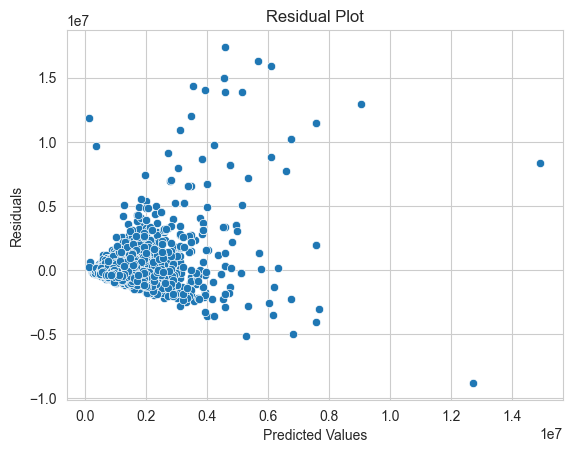

In [105]:
# plot residuals
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Simple Linear Regression

In [74]:
nonna_list = df_dummy.columns[df_dummy.isna().any()].tolist()

In [75]:
simple_df = df_dummy.drop(columns=nonna_list)

In [76]:
simple_df.head()

,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,NoisePollutionRoadS,PopulationDensityL,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,0.511176,0.286451,0.090908,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,...,True,False,False,False,False,False,False,False,False,False
1,0.511176,0.286451,0.090908,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,...,False,False,False,False,False,False,False,False,True,False
2,0.163362,0.095877,0.001911,0.0,0.0,0.0,0.334957,0.381257,0.297575,0.325887,...,True,False,False,False,False,False,False,False,False,False
3,0.511176,0.286451,0.090908,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,...,False,False,False,False,False,False,False,False,False,False
4,0.333865,0.279276,0.145835,0.0,0.0,0.0,0.133498,0.132933,0.235917,0.190986,...,False,False,False,False,False,False,False,False,False,False


In [77]:
simple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20941 entries, 0 to 22480
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ForestDensityL                               20941 non-null  float64
 1   ForestDensityM                               20941 non-null  float64
 2   ForestDensityS                               20941 non-null  float64
 3   NoisePollutionRailwayL                       20941 non-null  float64
 4   NoisePollutionRailwayM                       20941 non-null  float64
 5   NoisePollutionRailwayS                       20941 non-null  float64
 6   NoisePollutionRoadL                          20941 non-null  float64
 7   NoisePollutionRoadM                          20941 non-null  float64
 8   NoisePollutionRoadS                          20941 non-null  float64
 9   PopulationDensityL                           20941 non-null  float64
 10  Pop

In [78]:
scaler_columns = simple_df.columns[simple_df.dtypes == "float64"]
scaler_columns = scaler_columns.drop("price_cleaned")
scaler_columns

Index(['ForestDensityL', 'ForestDensityM', 'ForestDensityS',
       'NoisePollutionRailwayL', 'NoisePollutionRailwayM',
       'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM',
       'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM',
       'PopulationDensityS', 'RiversAndLakesL', 'RiversAndLakesM',
       'RiversAndLakesS', 'WorkplaceDensityL', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'distanceToTrainStation',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage',
       'gde_average_house_hold', 'gde_empty_apartments',
       'gde_foreigners_percentage', 'gde_new_homes_per_1000',
       'gde_pop_per_km2', 'gde_population', 'gde_private_apartments',
       'gde_social_help_quota', 'gde_tax', 'gde_workers_sector1',
       'gde_workers_sector2', 'gde_workers_sector3', 'gde_workers_total'],
      dtype='object')

In [79]:
X = simple_df.drop(columns=["price_cleaned"])
y = simple_df["price_cleaned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[scaler_columns] = scaler.fit_transform(X_train[scaler_columns])
X_test_scaled[scaler_columns] = scaler.transform(X_test[scaler_columns])

In [82]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 2119483206090.276
Mean Absolute Percentage Error: 408.56700426887306


In [83]:
# Coefficients with column names
coefficients = pd.DataFrame({"feature": X_train.columns, "coefficients": model.coef_})
coefficients

,feature,coefficients
0,ForestDensityL,-2.865968e+04
1,ForestDensityM,2.830357e+04
2,ForestDensityS,-2.914978e+04
3,NoisePollutionRailwayL,-1.262160e+05
4,NoisePollutionRailwayM,9.963101e+04
5,NoisePollutionRailwayS,-2.395302e+04
6,NoisePollutionRoadL,1.271735e+05
7,NoisePollutionRoadM,-2.209327e+05
8,NoisePollutionRoadS,1.411570e+05
9,PopulationDensityL,7.847051e+04


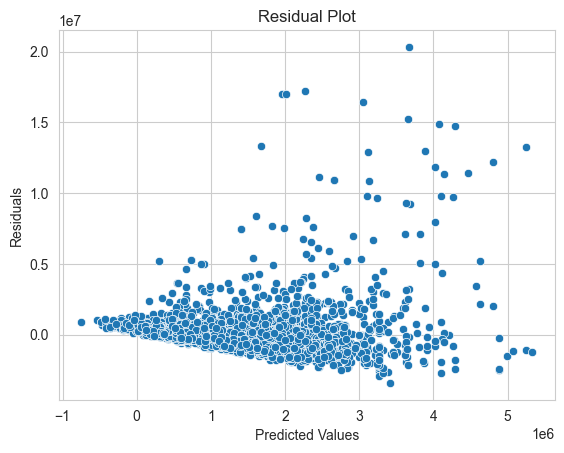

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [85]:
reg = linear_model.Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 2119916997137.8496
Mean Absolute Percentage Error: 406.2274036272094


C:\Users\wartm\Documents\FHNW\immo_challenge\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+16, tolerance: 4.950e+12
  model = cd_fast.enet_coordinate_descent(


In [86]:
# Coefficients with column names
coefficients = pd.DataFrame({"feature": X_train.columns, "coefficients": reg.coef_})
coefficients


,feature,coefficients
0,ForestDensityL,-2.750550e+04
1,ForestDensityM,2.608244e+04
2,ForestDensityS,-2.900088e+04
3,NoisePollutionRailwayL,-1.257833e+05
4,NoisePollutionRailwayM,1.000101e+05
5,NoisePollutionRailwayS,-2.485429e+04
6,NoisePollutionRoadL,1.240011e+05
7,NoisePollutionRoadM,-2.200298e+05
8,NoisePollutionRoadS,1.422924e+05
9,PopulationDensityL,7.608513e+04


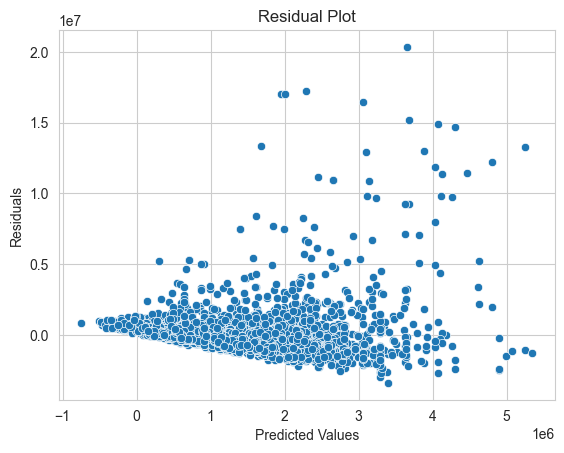

In [87]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()